In [1]:
import numpy as np
from scipy.linalg import expm
from math import pi
import matplotlib.pyplot as plt

$\bullet$ Exponential midpoint with skew-symmetric matrix $A(t)$

In [2]:
def rhs(t):
    return np.array([[1j -t,2+1j + np.sin(2*pi*t)],[-2+1j+t,3*1j + np.cos(2*pi*t)]]) #skew-hermitian matrix

In [3]:
ts = 4000
a = 0
b = 1
t = np.linspace(a,b,ts+1)
k = (b-a)/ts

y = np.zeros([2,ts+1])
y[:,0] = [1,1]

In [4]:
for n in range(0,ts):
    y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


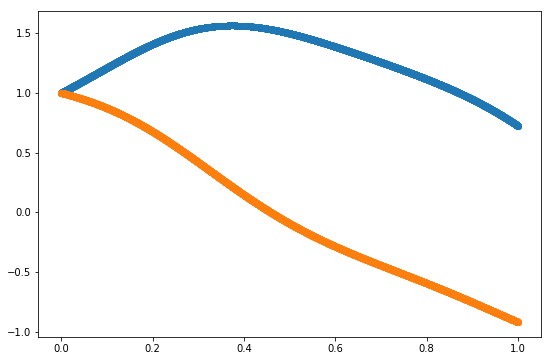

In [5]:
plt.figure(figsize=(9,6))
plt.plot(t,y[0,:],'-o',t,y[1,:],'-o')
#plt.plot(t,np.exp(-t),'-g')
plt.show()


$\bullet$ Convergence for 
$$Y'(t)= A(t) Y(t)$$

where $$A(t) = \begin{bmatrix}
i && 2+i \\
-2+i && 3i
\end{bmatrix}$$

Expected order of convergence is $1$, since $A$ is skew-hermitian and $$||A'(t) || \leq M_1 \qquad \forall t$$

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


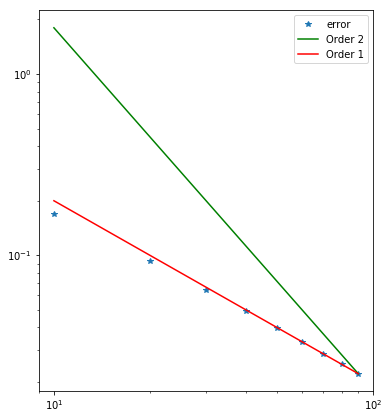

In [6]:
err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    #err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))
    err.append(np.linalg.norm(y[:,-1] - yRif[:,-1],np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 2,'g',label='Order 2')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 1,'r',label='Order 1')
plt.legend()
plt.show()

$\bullet$ Exponential midpoint with **not** skew-symmetrix matrix $A(t)$

In [7]:
def rhs(t):
    return np.array([[np.sin(2*pi*t),t-5],[t+1,-t]]) #non skew-symmetric


ts = 4000
t = np.linspace(a,b,ts+1)
k = (b-a)/ts
y = np.zeros([2,ts+1])
y[:,0] = [1,1]

In [8]:
for n in range(0,ts):
    y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]

Convergence for 
$$Y'(t)= A(t) Y(t)$$

where $$A(t) = \begin{bmatrix}
\sin(2 \pi t) && t-5 \\
t+1 && -t
\end{bmatrix}$$

Expected order of convergence is $2$, by Lubich (2003) error bound.

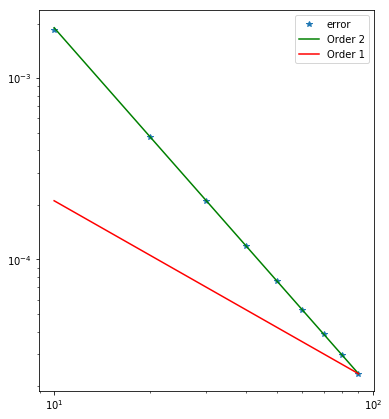

In [9]:
err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    #err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))
    err.append(np.linalg.norm(y[:,-1] - yRif[:,-1],np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 2,'g',label='Order 2')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 1,'r',label='Order 1')
plt.legend()
plt.show()

Convergence for 

$$Y'(t)= A Y(t) $$

where $$A = \begin{bmatrix}
-1 && 0 \\
0 && -1
\end{bmatrix}$$

The exponential midpoint rule is expected to be exact for time-independent problems

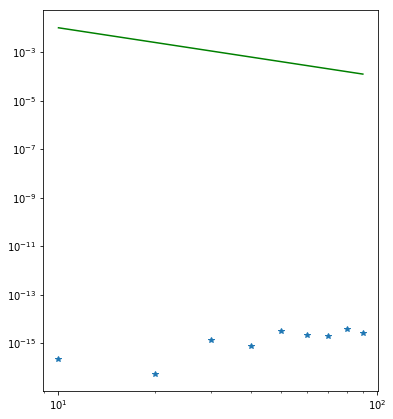

In [10]:
def rhs(t):
    return np.array([[-1,0],[0,-1]])


def uex(t):
    return np.array([np.exp(-t),np.exp(-t)])

err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange, 1/tsrange**2,'g',label='Order 2')
plt.show()